# 10-3. CIFAR10 딥러닝 모델

## 1. 데이터 로드 및 전처리
- CIFAR10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다. 
- 데이터셋은 keras.datasets에서 불러올 수 있는 CIFAR10 데이터 셋을 활용합니다.
- 데이터셋 분리 작업에서는 sklearn 라이브러리의 train_test_split 함수를 활용합니다.
- 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다. 

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils

In [2]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                 test_size=0.2,
                                                 random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇개인지 출력합니다.
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

170498071/170498071 [==============================] - 36s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


- class_name 변수를 만들어   
cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'를 담습니다.

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

- 데이터 중 샘플 하나를 시각화해보고, 데이터의 형태를 확인해봅니다.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDep

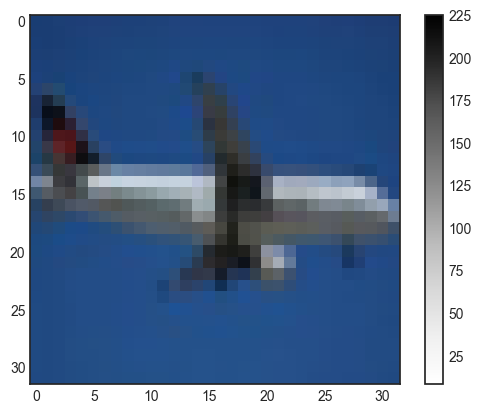

In [5]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [6]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


- 데이터의 형태를 변형하여 모델이 잘 학습할 수 있게끔 해줍니다.

In [7]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32*32*3)
x_val = x_val.reshape(-1, 32*32*3)
x_test = x_test.reshape(-1, 32*32*3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [8]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

## 2. 모델 구성 및 컴파일
BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하고, 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.

In [12]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(2048, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2048, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation ='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 2048)              6293504   
                                                                 
 batch_normalization_6 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_16 (Dense)            (None, 1024)              2098176   
                                                                 
 batch_normalization_7 (Bat  (None, 1024)              4096      
 chNormalization)                                     

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

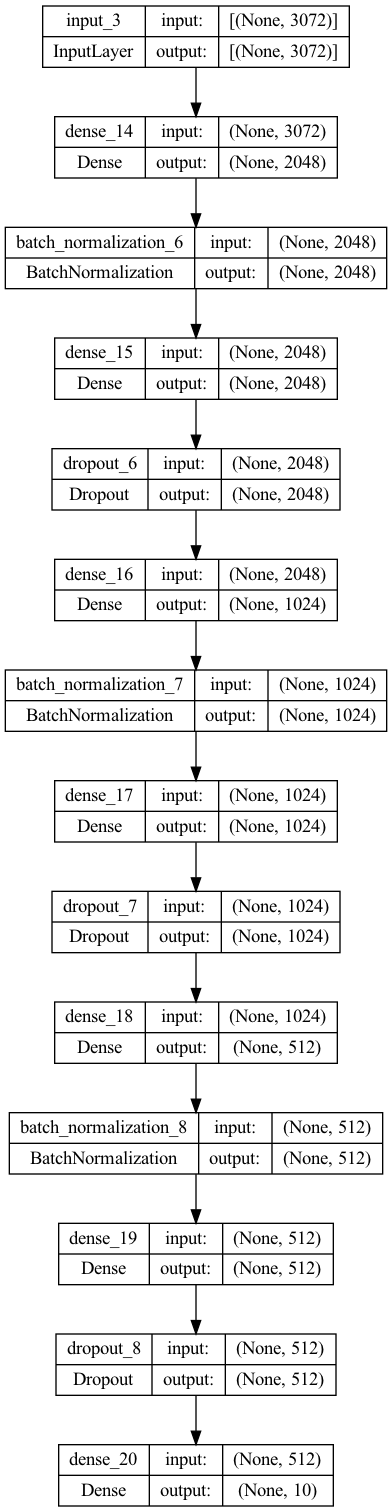

In [14]:
utils.plot_model(model, show_shapes=True)

## 3. 모델 학습
ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

In [16]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10.h5',
                                          save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                           monitor='val_loss',
                                           restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                   validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1250/1250 [==============================] - 25s 20ms/step - loss: 2.0925 - accuracy: 0.2581 - val_loss: 2.5255 - val_accuracy: 0.1242
Epoch 2/60
   4/1250 [..............................] - ETA: 27s - loss: 1.9959 - accuracy: 0.2812

/opt/homebrew/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1250/1250 [==============================] - 27s 22ms/step - loss: 1.9085 - accuracy: 0.3065 - val_loss: 2.9155 - val_accuracy: 0.1202
Epoch 3/60
1250/1250 [==============================] - 27s 22ms/step - loss: 1.8475 - accuracy: 0.3320 - val_loss: 2.3854 - val_accuracy: 0.1316
Epoch 4/60
1250/1250 [==============================] - 28s 22ms/step - loss: 1.8174 - accuracy: 0.3444 - val_loss: 1.8441 - val_accuracy: 0.3274
Epoch 5/60
1250/1250 [==============================] - 29s 23ms/step - loss: 1.7980 - accuracy: 0.3529 - val_loss: 2.0577 - val_accuracy: 0.2233
Epoch 6/60
1250/1250 [==============================] - 29s 23ms/step - loss: 1.8023 - accuracy: 0.3513 - val_loss: 2.1361 - val_accuracy: 0.1877
Epoch 7/60
1250/1250 [==============================] - 28s 23ms/step - loss: 1.7969 - accuracy: 0.3485 - val_loss: 1.9314 - val_accuracy: 0.2844
Epoch 8/60
1250/1250 [==============================] - 29s 23ms/step - loss: 1.7747 - accuracy: 0.3604 - val_loss: 1.8763 - val_accura

- 학습 히스토리의 loss, val_loss, accuracy, val_accuracy를 차트로 시각화합니다.

/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDep

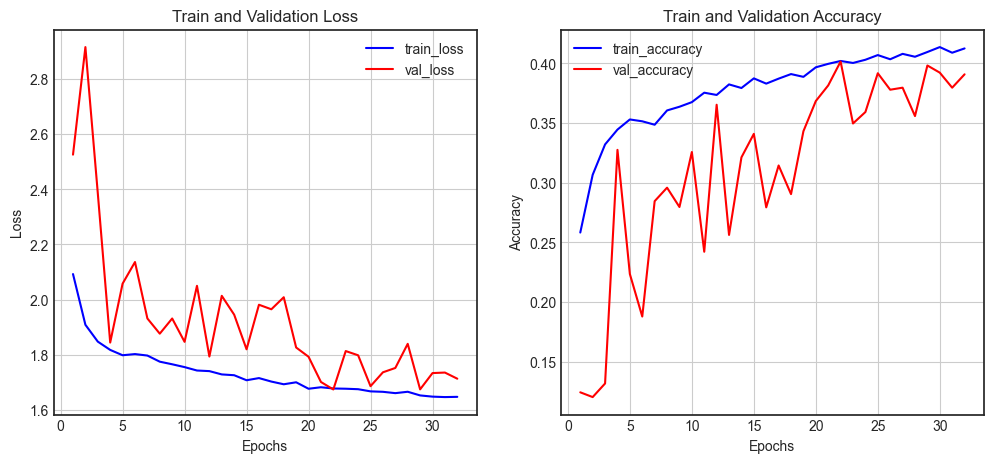

In [18]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

show_history(history)

## 4. 모델 평가 및 예측
테스트 데이터셋을 이용해 모델을 평가합니다.

In [19]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 1.6673 - accuracy: 0.4049


[1.667258381843567, 0.4049000144004822]

- loss는 강의 영상의 수치와 유사
- accuracy는 1.5 정도의 차이를 보임

---
성능 향상 시도

In [20]:
# 문제 3-3: BatchNormalization과 Dropout을 적용하여 빠른 학습과 과대적합을 방지하고,
# 10개의 이미지를 분류하는 딥러닝 모델을 구성합니다.
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(2048, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2048, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation ='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 2048)              6293504   
                                                                 
 batch_normalization_9 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_9 (Dropout)         (None, 2048)              0         
                                                                 
 dense_23 (Dense)            (None, 1024)              2098176   
                                                                 
 batch_normalization_10 (Ba  (None, 1024)              4096      
 tchNormalization)                                    

In [21]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [23]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10.h5',
                                          save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                           monitor='val_loss',
                                           restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60, batch_size=512,
                   validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
79/79 [==============================] - 8s 99ms/step - loss: 2.0155 - accuracy: 0.3001 - val_loss: 2.3149 - val_accuracy: 0.1098
Epoch 2/60
79/79 [==============================] - 8s 99ms/step - loss: 1.7184 - accuracy: 0.3975 - val_loss: 2.2989 - val_accuracy: 0.1298
Epoch 3/60
79/79 [==============================] - 8s 99ms/step - loss: 1.5820 - accuracy: 0.4455 - val_loss: 1.9654 - val_accuracy: 0.3024
Epoch 4/60
79/79 [==============================] - 8s 99ms/step - loss: 1.4987 - accuracy: 0.4705 - val_loss: 2.0050 - val_accuracy: 0.2927
Epoch 5/60
79/79 [==============================] - 8s 100ms/step - loss: 1.4261 - accuracy: 0.4949 - val_loss: 2.0380 - val_accuracy: 0.2337
Epoch 6/60
79/79 [==============================] - 8s 99ms/step - loss: 1.3835 - accuracy: 0.5116 - val_loss: 2.6021 - val_accuracy: 0.1461
Epoch 7/60
79/79 [==============================] - 8s 99ms/step - loss: 1.3437 - accuracy: 0.5246 - val_loss: 3.1589 - val_accuracy: 0.1056
Epoch 8/60
7

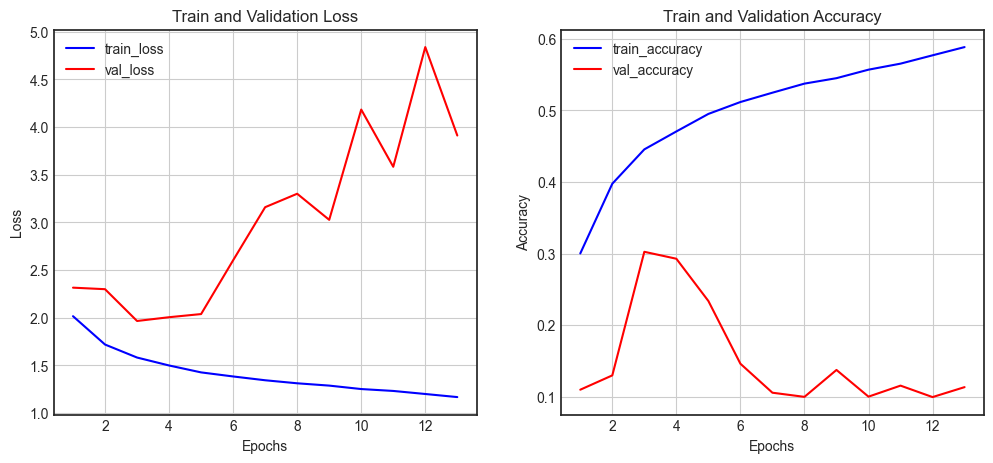

In [24]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

show_history(history)

In [25]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 1.9644 - accuracy: 0.2958


[1.9643967151641846, 0.29580000042915344]

- 배치 사이즈를 추가하니 오히려 안 좋아짐.
---
- 첫번째 시도의 코드에서 1층만 더 쌓아보기로.

In [26]:
model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.Dense(2048, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(2048, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2048, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1024, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation ='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 2048)              6293504   
                                                                 
 batch_normalization_12 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dense_29 (Dense)            (None, 2048)              4196352   
                                                                 
 dropout_12 (Dropout)        (None, 2048)              0         
                                                                 
 dense_30 (Dense)            (None, 2048)              4196352   
                                                                 
 batch_normalization_13 (Ba  (None, 2048)              8192      
 tchNormalization)                                    

In [27]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [28]:
# 문제 3-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.

from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('cifar10.h5',
                                          save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10,
                                           monitor='val_loss',
                                           restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=50,
                   validation_data=(x_val, y_val),
                   callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/50
1250/1250 [==============================] - 33s 26ms/step - loss: 2.1823 - accuracy: 0.2182 - val_loss: 2.4168 - val_accuracy: 0.1054
Epoch 2/50
1250/1250 [==============================] - 32s 26ms/step - loss: 1.9845 - accuracy: 0.2655 - val_loss: 2.5212 - val_accuracy: 0.1391
Epoch 3/50
1250/1250 [==============================] - 32s 25ms/step - loss: 1.9397 - accuracy: 0.2878 - val_loss: 2.6852 - val_accuracy: 0.1051
Epoch 4/50
1250/1250 [==============================] - 32s 26ms/step - loss: 1.9194 - accuracy: 0.2938 - val_loss: 2.6427 - val_accuracy: 0.1391
Epoch 5/50
1250/1250 [==============================] - 32s 26ms/step - loss: 1.8968 - accuracy: 0.3078 - val_loss: 2.1232 - val_accuracy: 0.2451
Epoch 6/50
1250/1250 [==============================] - 33s 27ms/step - loss: 1.8903 - accuracy: 0.3121 - val_loss: 2.0145 - val_accuracy: 0.2604
Epoch 7/50
1250/1250 [==============================] - 33s 26ms/step - loss: 1.8730 - accuracy: 0.3203 - val_loss: 1.9930 -

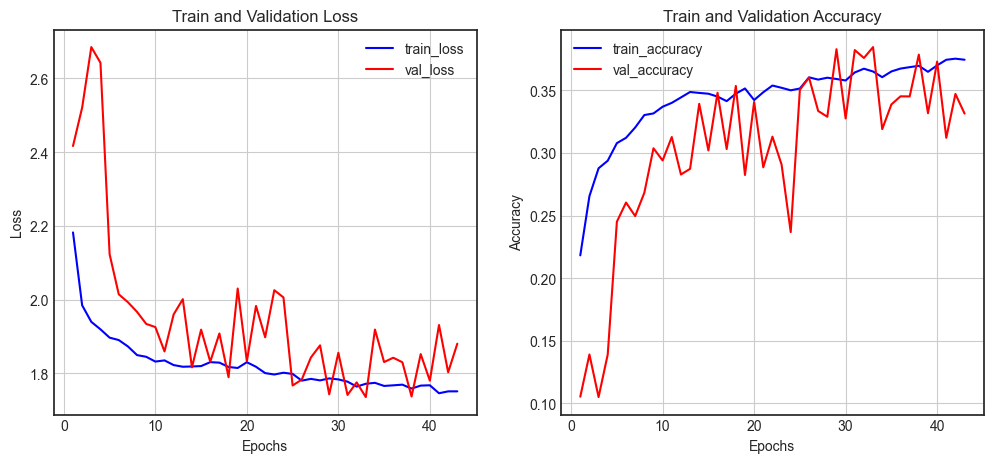

In [29]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

show_history(history)

In [30]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.7330 - accuracy: 0.3853


[1.732956051826477, 0.38530001044273376]

- 최종적으로 맨 처음의 실험이 가장 좋은 결과!